In [15]:
import pandas as pd

# 머신러닝을 위한 기본적인 데이터 준비

데이터 분석을 위한 데이터 준비 단계
1. 데이터 불러오기
2. 데이터 살펴보기
3. 데이터 분할: train, test, validation ...
4. 데이터 변환: scale, normalize ...

### 1. 기본적인 데이터 분석을 위한 toy data set 불러오기 - boston
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston
<br>
실제 데이터 분석에서는 파일, 데이터베이스 등 다양한 소스로부터 데이터를 불러 옴

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(type(boston))

<class 'sklearn.utils.Bunch'>


sklearn.utils.Bunch: 파이썬의 dictionary와 유사한 객체, 키와 값으로 구성되어 있음
<br>keys()를 이용해 어떤 key들이 있는지 확인하고, key값을 사용해 data를 불러올 수 있음

In [35]:
print(boston.keys()) 
#boston.data.mean()
#boston.target.min()
#boston.filename
#boston.feature_names
#print(boston.DESCR)
#check all once 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [36]:
#print(boston.DESCR) #boston['DESCR'] 도 가능

print(type(boston.data), type(boston.target))
print(boston.data.shape, boston.target.shape)
print(boston.data[:5])
print(boston.target[:5])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(506, 13) (506,)
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


boston data를 이용한 분석 맛보기
<br>
http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py

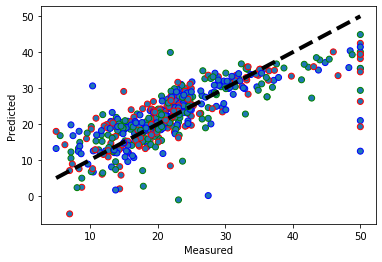

In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10) #cv = cross validation valuation

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=("r","g","b"))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### 2. 데이터 살펴보기
<br>
목적: 데이터가 어떤 모양인지와 데이터 간의 연관성 등을 파악
<br>
이를 위해서는 그래프가 필수적임: matplotlib를 사용
<br>
https://matplotlib.org/tutorials/index.html

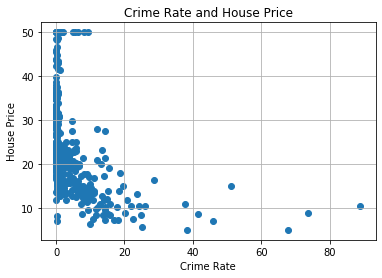

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

x = boston.data[:,0] # 0 is og try change columns differents to show the relations
y = boston.target

#간략 버전
#plt.scatter(x, y)
#plt.show()

fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set(xlabel='Crime Rate', ylabel='House Price',
       title='Crime Rate and House Price')
ax.grid()

fig.savefig("test.png")

We can see Higher the crime rates the price will lower down to very low

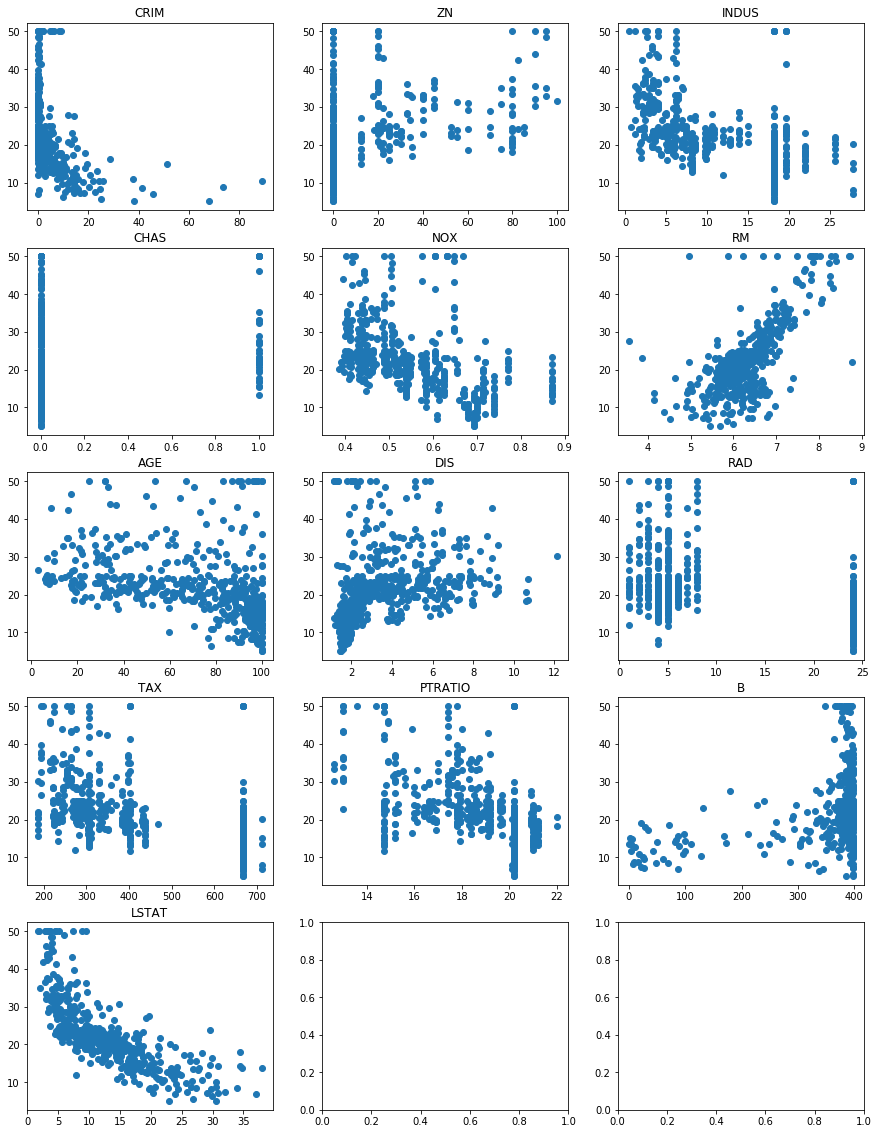

In [20]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
y = boston.target

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < boston.data.shape[1]:
        x = boston.data[:,i]

        ax.set_title(boston.feature_names[i])
        ax.scatter(x, y)
plt.show()

### 3. 데이터 분할
<br>
목적: 학습용 데이터와 검증용 데이터로 분리해서 올바르게 학습되었는지 확인
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.2) #test_size를 명시하지 않으면 0.25
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


### 4. 데이터 변환 (표준화: Standardize features)
<br>
목적: 데이터 간 분포의 편차가 클 때, 이를 조정함
<br>
일반적으로는 feature 별(column별)로 독립적으로 수행하나, 상황에 따라 같은 sample 내(row별)에서 수행할수도 있음
<br>
상황에 따라서 수행여부 선택: 에러가 발생하거나 예측률을 향상시키고자 할 때 수행, 본 수업에서는 특별한 언급이 없으면 하지 않음
<br>
주의사항: train과 test set 전체에 대해 fit을 하고 나눠서 사용할 수도 있으나, 원칙적으로는 train data에 대해서만 fit을 하고 이 scaler를 이용해 test data를 transform하는 것이 정확함
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
print('scaler mean:', scaler.mean_)
print('scaler variance:', scaler.var_)

print('--- train data before scaling ---')
print(X_train[:5])
scaled_X_train = scaler.transform(X_train)
print('--- train data after scaling ---')
print(scaled_X_train[:5])

scaled_X_test = scaler.transform(X_test)
print('--- test data after scaling ---')
print(scaled_X_test[:5])

StandardScaler(copy=True, with_mean=True, with_std=True)
scaler mean: [3.38193975e+00 1.11287129e+01 1.10793812e+01 6.68316832e-02
 5.54819059e-01 6.27915347e+00 6.87230198e+01 3.79533416e+00
 9.26485149e+00 4.02658416e+02 1.84482673e+01 3.60596040e+02
 1.25930941e+01]
scaler variance: [6.45167777e+01 5.42438879e+02 4.57468073e+01 6.23652093e-02
 1.33234308e-02 4.75750798e-01 7.71116376e+02 4.45885240e+00
 7.34026260e+01 2.70764229e+04 4.80893264e+00 6.99615071e+03
 4.86097837e+01]
--- train data before scaling ---
[[8.22100e-02 2.20000e+01 5.86000e+00 0.00000e+00 4.31000e-01 6.95700e+00
  6.80000e+00 8.90670e+00 7.00000e+00 3.30000e+02 1.91000e+01 3.86090e+02
  3.53000e+00]
 [1.00245e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.67400e+00
  8.73000e+01 4.23900e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.80230e+02
  1.19800e+01]
 [1.95390e-01 0.00000e+00 1.08100e+01 0.00000e+00 4.13000e-01 6.24500e+00
  6.20000e+00 5.28730e+00 4.00000e+00 3.05000e+02 1.92000e+01 3.77170e+02
  7.5